# Experiment to try out streming algorithms

## Data Stream Analysis - Small sample of Concept Drift

In [8]:
from skmultiflow.data import SEAGenerator
from skmultiflow.data import ConceptDriftStream
from skmultiflow.data import AnomalySineGenerator
from skmultiflow.data import RandomRBFGenerator
from skmultiflow.data import RandomRBFGeneratorDrift
from skmultiflow.bayes import NaiveBayes

n_samples = 1000
drift_position = int(n_samples/2)
drift_width = int(n_samples/10)

#generator = AnomalySineGenerator(n_samples=n_samples, contextual=True, random_state=1)      # create a stream

#stream = SEAGenerator(random_state=1)      # create a stream
#stream = RandomRBFGenerator(n_features = 10, n_centroids = 50)
#stream = RandomRBFGeneratorDrift(n_features = 10, n_centroids = 50, num_drift_centroids=50, change_speed=200)
stream = ConceptDriftStream(stream = RandomRBFGenerator(),
                            drift_stream = RandomRBFGeneratorDrift(num_drift_centroids=100, change_speed=200),
                            position = drift_position,
                            width=drift_width)

## Data stream snippet

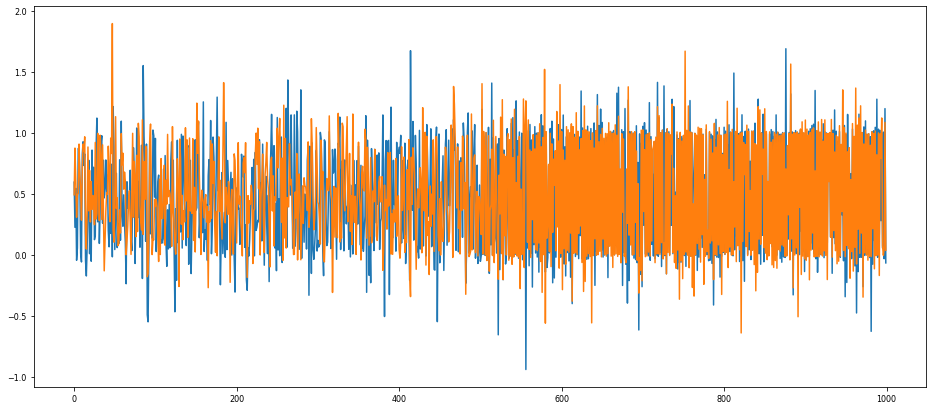

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (16,7)

data = []
labels = []

snippet = [drift_position-500, drift_position+500]

for i in range(n_samples):
    X, Y = stream.next_sample()        # get the next sample
    
    #print(X)
    #print(Y)
    
    data.append(list(X[0]))
    labels.append(Y[0])    
    
    
##############################
# Convert and Reshape stuff
data = np.array(data)
data.reshape(-1,X[0].shape[0])

labels = np.array(labels)

#print("true labels: " , labels)

plt.plot(range(n_samples), data[:,0], label="Sine")
plt.plot(range(n_samples), data[:,1], label="Cosine")
plt.show()


## Clustering analysis of Concept Drift

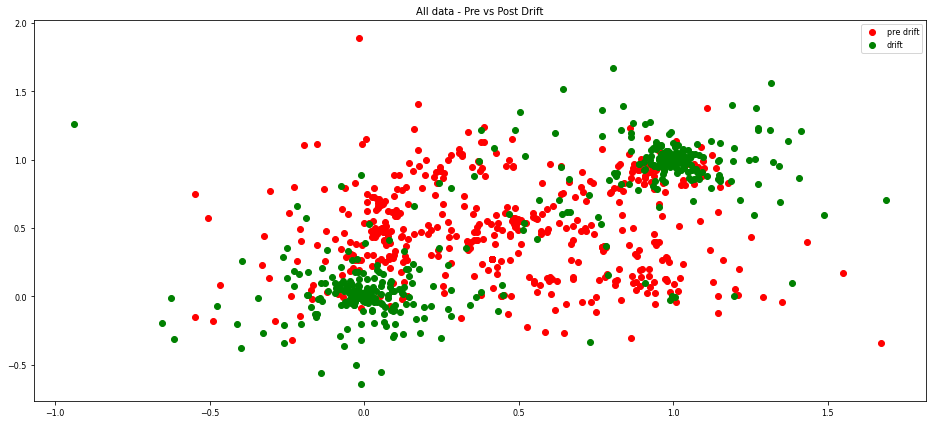

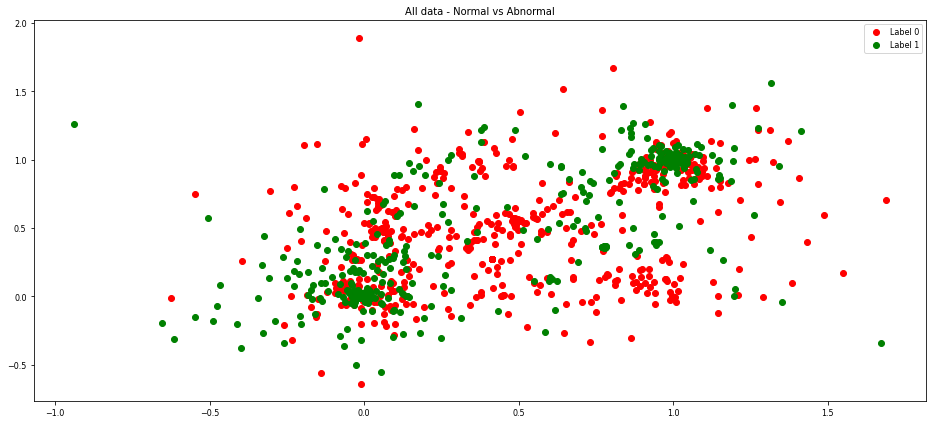

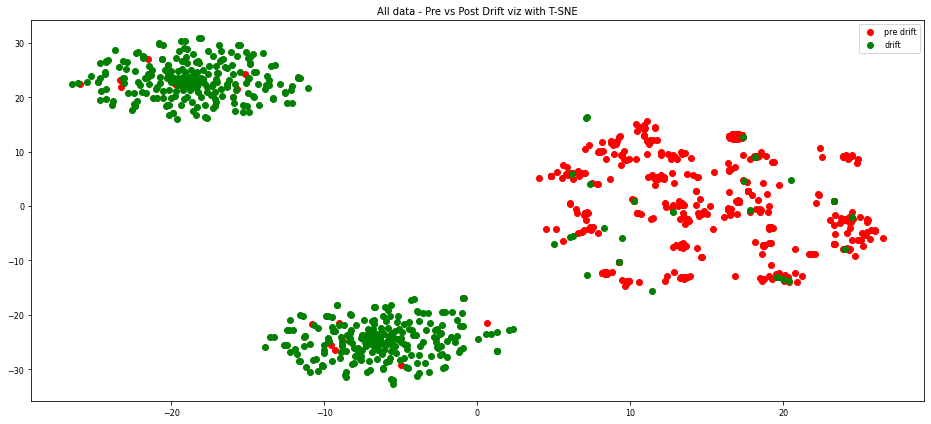

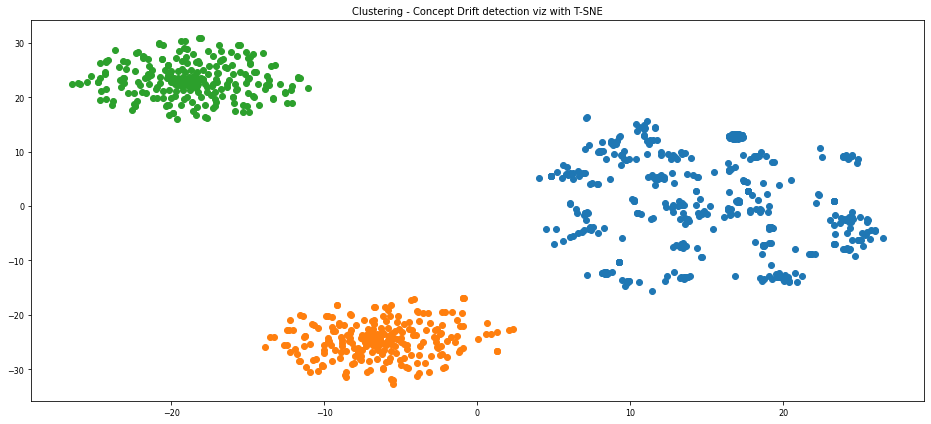

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import AffinityPropagation
from sklearn import manifold


###############################
plt.scatter(data[:drift_position, 0], data[:drift_position, 1], c='r', label="pre drift")
plt.scatter(data[drift_position:, 0], data[drift_position:, 1], c='g', label="drift")
plt.title("All data - Pre vs Post Drift")
plt.legend()
plt.show()


###############################
red = labels == 0
green = labels == 1

plt.scatter(data[red, 0], data[red, 1], c='r', label="Label 0")
plt.scatter(data[green, 0], data[green, 1], c='g', label="Label 1")
plt.title("All data - Normal vs Abnormal")
plt.legend()
plt.show()


#########################################
# T-SNE
n_components = 2
perplexities = [5, 30, 50, 100]

tsne = manifold.TSNE(n_components=n_components,
                     init='random',
                     random_state=0,
                     perplexity=perplexities[2])

X_transf = tsne.fit_transform(data)

plt.scatter(X_transf[:drift_position, 0], X_transf[:drift_position, 1], c='r', label="pre drift")
plt.scatter(X_transf[drift_position:, 0], X_transf[drift_position:, 1], c='g', label="drift")
plt.title("All data - Pre vs Post Drift viz with T-SNE")
plt.legend()
plt.show()


#########################################
# Clustering over T-SNE / PCA
#clustering = DBSCAN(eps=3, min_samples=15).fit(X_transf)
clustering = OPTICS(min_samples=50, xi=.05, min_cluster_size=.2).fit(X_transf)

set_labels = set(clustering.labels_)

clusters_color = {}
for c in set_labels:    
    clusters_color[c] = clustering.labels_ == c


for key in clusters_color:
    if key == -1:
        plt.scatter(X_transf[clusters_color[key], 0], X_transf[clusters_color[key], 1], c='black')
    else:
        plt.scatter(X_transf[clusters_color[key], 0], X_transf[clusters_color[key], 1])
    
plt.title("Clustering - Concept Drift detection viz with T-SNE")
plt.show()



## Prepare for Streaming

In [11]:
from skmultiflow.data import SEAGenerator
from skmultiflow.data import ConceptDriftStream
from skmultiflow.data import AnomalySineGenerator
from skmultiflow.data import RandomRBFGenerator
from skmultiflow.data import RandomRBFGeneratorDrift
from skmultiflow.bayes import NaiveBayes

n_samples = 100000
drift_position = int(n_samples/2)
drift_width = int(n_samples/10)

#generator = AnomalySineGenerator(n_samples=n_samples, contextual=True, random_state=1)      # create a stream

#stream = SEAGenerator(random_state=1)      # create a stream
#stream = RandomRBFGenerator(n_features = 10, n_centroids = 50)
#stream = RandomRBFGeneratorDrift(n_features = 10, n_centroids = 50, num_drift_centroids=50, change_speed=200)
stream = ConceptDriftStream(stream = RandomRBFGenerator(),
                            drift_stream = RandomRBFGeneratorDrift(num_drift_centroids=100, change_speed=200),
                            position = drift_position,
                            width=drift_width)

## Multi-flow implementation of online learning and evaluation

<IPython.core.display.Javascript object>


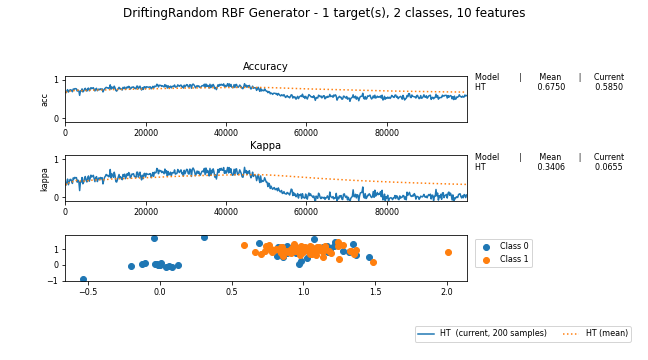

C:\Users\jpcre\Anaconda3\envs\stream_env\lib\site-packages\skmultiflow\visualization\evaluation_visualizer.py:185: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  self.fig.canvas.set_window_title('scikit-multiflow')


Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #################### [100%] [100.44s]
Processed samples: 100000
Mean performance:
HT - Accuracy     : 0.6747
HT - Kappa        : 0.3400


<IPython.core.display.Javascript object>


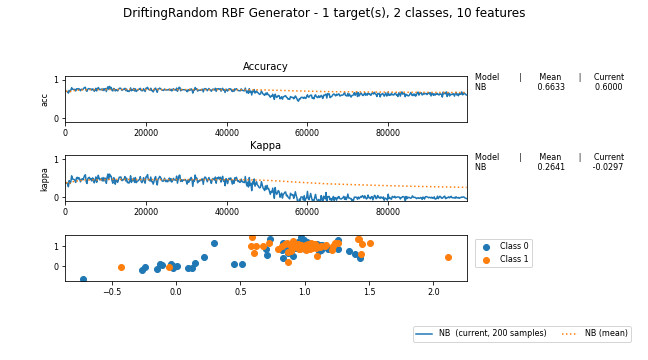

C:\Users\jpcre\Anaconda3\envs\stream_env\lib\site-packages\skmultiflow\visualization\evaluation_visualizer.py:185: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  self.fig.canvas.set_window_title('scikit-multiflow')


Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #################### [100%] [91.98s]
Processed samples: 100000
Mean performance:
NB - Accuracy     : 0.6632
NB - Kappa        : 0.2630
Time elapsed:  192.88559079170227


<IPython.core.display.Javascript object>


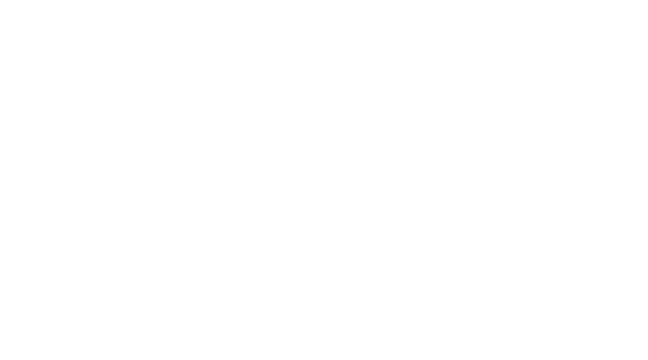

<IPython.core.display.Javascript object>


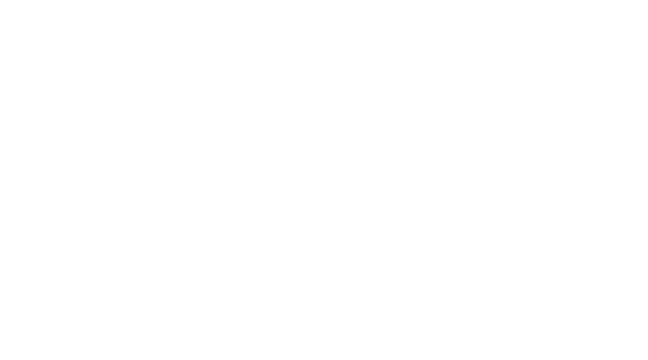

In [5]:
import time
from skmultiflow.trees import HoeffdingTreeClassifier

#############################
# Start monitoring
start = time.time()

ht = HoeffdingTreeClassifier()
nb = NaiveBayes()

%matplotlib notebook
from skmultiflow.evaluation import EvaluatePrequential

evaluator = EvaluatePrequential(max_samples=n_samples,
                                #n_wait=1,
                                pretrain_size=1,
                                max_time=1000, 
                                show_plot=True, 
                                metrics=['accuracy', 'kappa'], 
                                data_points_for_classification=True)

#evaluator.evaluate(stream=stream, model=[ht, nb], model_names=['HT', 'NB'])
evaluator.evaluate(stream=stream, model=[ht], model_names=['HT'])
evaluator.evaluate(stream=stream, model=[nb], model_names=['NB'])

#############################
# Stop monitoring
end = time.time()
print("Time elapsed: " , end - start)


## Manual learning and evaluation

10.0 % | Mean Accuracy: 0.7489 | Current Acc:  0.79
20.0 % | Mean Accuracy: 0.77865 | Current Acc:  0.86
30.0 % | Mean Accuracy: 0.7995666666666666 | Current Acc:  0.84
40.0 % | Mean Accuracy: 0.8127 | Current Acc:  0.815
50.0 % | Mean Accuracy: 0.81074 | Current Acc:  0.69
60.0 % | Mean Accuracy: 0.7759666666666667 | Current Acc:  0.575
70.0 % | Mean Accuracy: 0.7479 | Current Acc:  0.57
80.0 % | Mean Accuracy: 0.727 | Current Acc:  0.585
90.0 % | Mean Accuracy: 0.7109111111111112 | Current Acc:  0.63
Preparing for plotting...


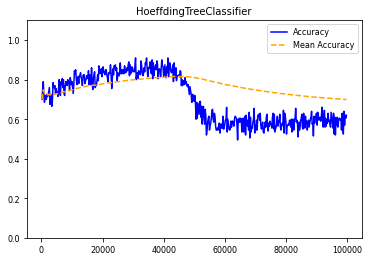

HoeffdingTreeClassifier - Final mean Acc:  0.6994188376753507
HoeffdingTreeClassifier - Current Acc:  0.62
10.0 % | Mean Accuracy: 0.728 | Current Acc:  0.705
20.0 % | Mean Accuracy: 0.73265 | Current Acc:  0.73
30.0 % | Mean Accuracy: 0.7346333333333334 | Current Acc:  0.72
40.0 % | Mean Accuracy: 0.740075 | Current Acc:  0.82
50.0 % | Mean Accuracy: 0.73586 | Current Acc:  0.67
60.0 % | Mean Accuracy: 0.7077166666666667 | Current Acc:  0.535
70.0 % | Mean Accuracy: 0.6819571428571428 | Current Acc:  0.495
80.0 % | Mean Accuracy: 0.6606125 | Current Acc:  0.52
90.0 % | Mean Accuracy: 0.6436111111111111 | Current Acc:  0.51
Preparing for plotting...


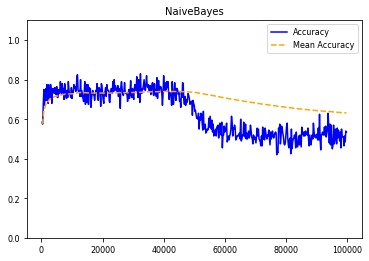

NaiveBayes - Final mean Acc:  0.631503006012024
NaiveBayes - Current Acc:  0.535
Time elapsed:  140.85933995246887


In [6]:
%matplotlib inline
import time
import matplotlib.pyplot as plt
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.bayes import NaiveBayes
from skmultiflow.data import ConceptDriftStream
from statistics import mean


#############################
# Start monitoring
start = time.time()


###########################################
# Classifier declaration
ht = HoeffdingTreeClassifier()
nb = NaiveBayes()

def run_stream(clf, name, stream_in, n_samples):
    
    stream_in.restart()
    ###########################################
    # Stream parameters
    correctness_dist = []
    timestamp = []
    accuracy = []
    mean_vals = []
    window =  200


    ###########################################
    # Learning and Evaluation
    # Test-then-fit
    for i in range(n_samples):
        X, Y = stream_in.next_sample()        # get the next sample

        prediction = clf.predict(X)       # predict Y using the tree     
        if Y == prediction:                # check the prediction
            correctness_dist.append(1)
        else:
            correctness_dist.append(0)

        # Test
        if (i % window == 0) and (i > 1):
            timestamp.append(i)
            acc_temp = sum(correctness_dist[-window:]) / len(correctness_dist[-window:])
            accuracy.append(acc_temp)
            mean_temp = mean(accuracy)
            mean_vals.append(mean_temp)
            
            if i % (n_samples/10) == 0:
                print((i / n_samples) * 100 , "% | Mean Accuracy:" , mean_temp , "| Current Acc: " , acc_temp)

        # Fit
        clf.partial_fit(X, Y)             # update the tree

        



    ###########################################
    # Plotting
    print("Preparing for plotting...")

    plt.plot(timestamp, accuracy, color='blue', label = "Accuracy")
    plt.plot(timestamp, mean_vals, color='orange', linestyle='dashed', label="Mean Accuracy")
    plt.ylim([0, 1.1])
    plt.title(name)
    plt.legend()
    plt.show()
    
    print(name, "- Final mean Acc: " , mean_vals[-1])
    print(name, "- Current Acc: " , accuracy[-1])


run_stream(ht, "HoeffdingTreeClassifier", stream, n_samples)
run_stream(nb, "NaiveBayes", stream, n_samples)

#############################
# Stop monitoring
end = time.time()
print("Time elapsed: " , end - start)